In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/Electricity-Power'
os.chdir(folder_path)


Mounted at /content/drive


In [ ]:
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc

## 3- Price & Consumption Impact Analysis

### How do scheduled commercial exchanges influence price fluctuations?


In [ ]:
resampled_df = pd.read_csv('hourly_resampled_df_19052_196.csv')
resampled_df.set_index('End date', inplace=True)
resampled_df.index = pd.to_datetime(resampled_df.index )


In [ ]:
scheduled = [col for col in resampled_df.columns if 'scheduled' in col.lower() and 'residual' not in col.lower()]
residual_scheduled = [col for col in resampled_df.columns if 'scheduled' in col.lower() and 'residual' in col.lower()]
prices = [col for col in resampled_df.columns if 'day-ahead_prices' in col.lower()]
cb = [col for col in resampled_df.columns if 'cross' in col.lower()and 'residual' not in col.lower()]
residual_cb = [col for col in resampled_df.columns if 'cross' in col.lower()and 'residual' in col.lower()]

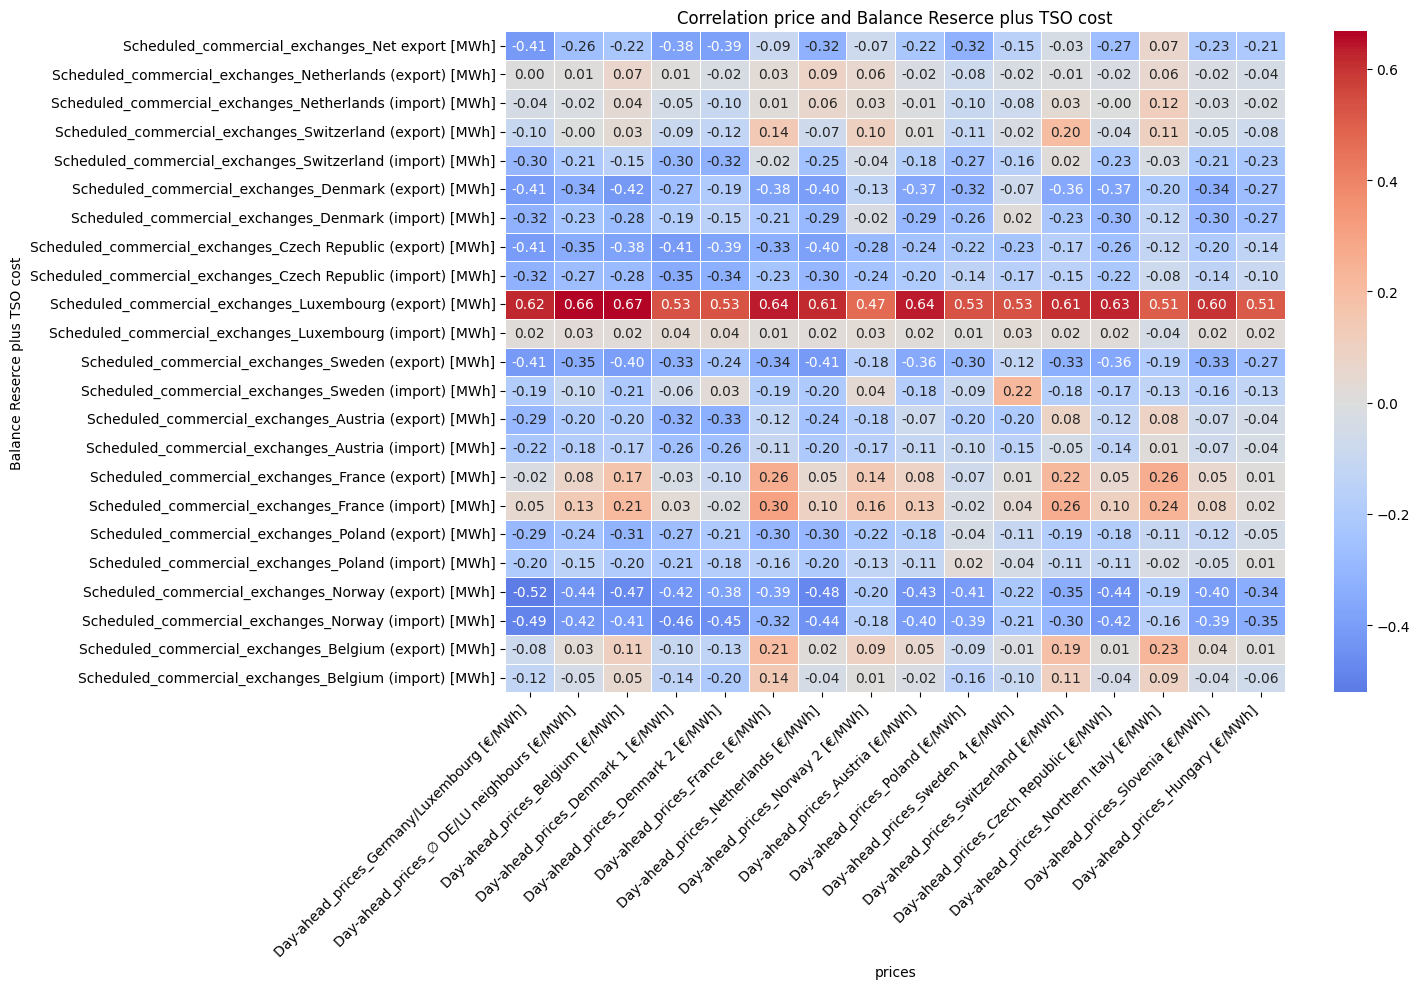

In [ ]:
corr_matrix = resampled_df[prices].apply(
    lambda col: resampled_df[scheduled].corrwith(col)
)
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation price and Balance Reserce plus TSO cost')
plt.xlabel('prices')
plt.ylabel('Balance Reserce plus TSO cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

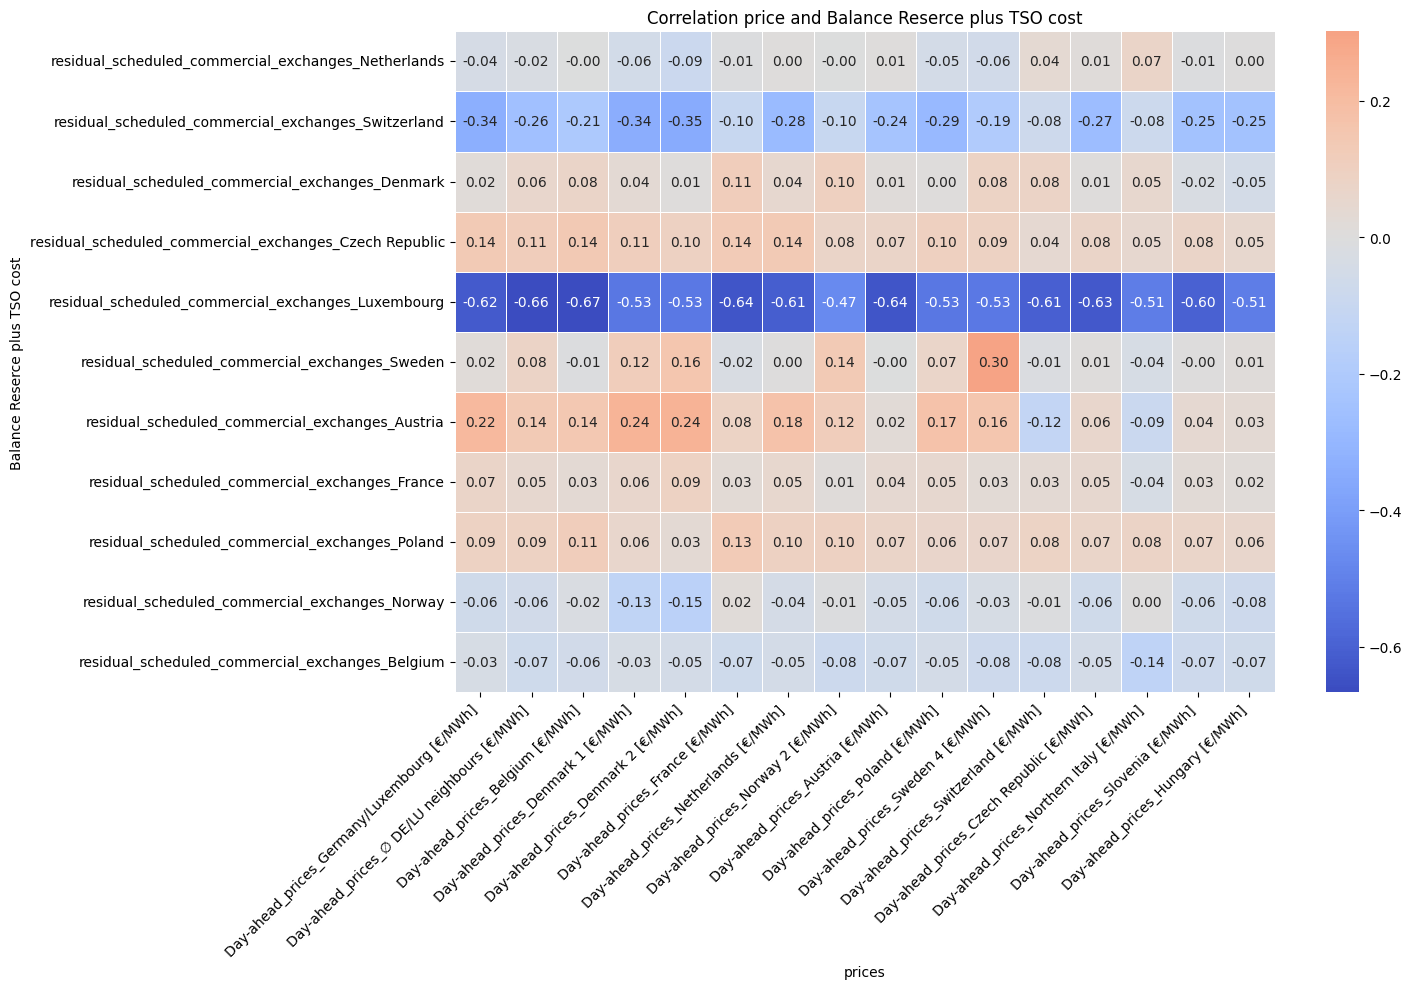

In [ ]:
corr_matrix = resampled_df[prices].apply(
    lambda col: resampled_df[residual_scheduled].corrwith(col)
)
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation price and Balance Reserce plus TSO cost')
plt.xlabel('prices')
plt.ylabel('Balance Reserce plus TSO cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

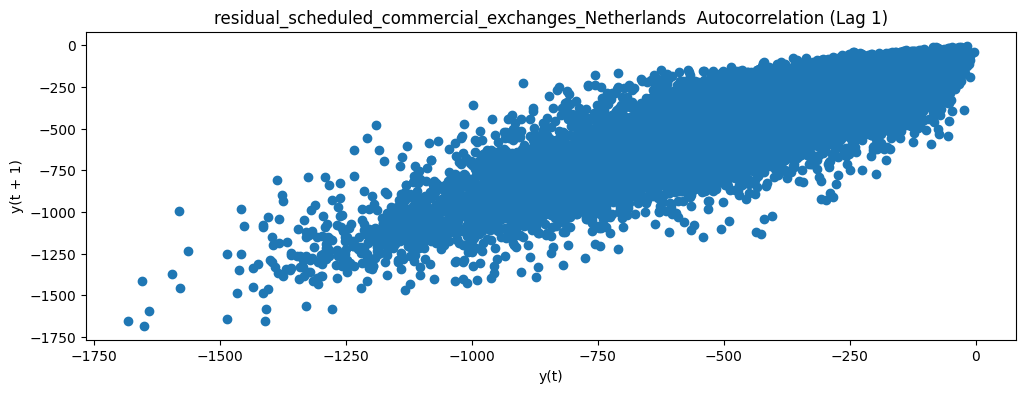

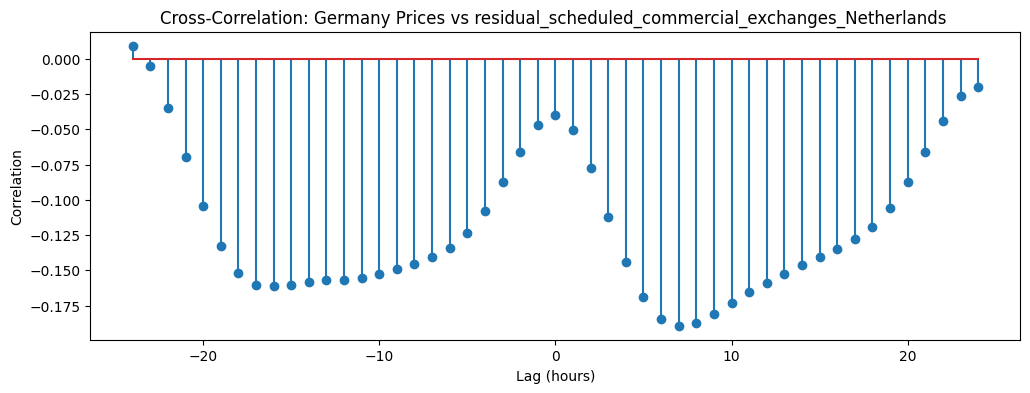

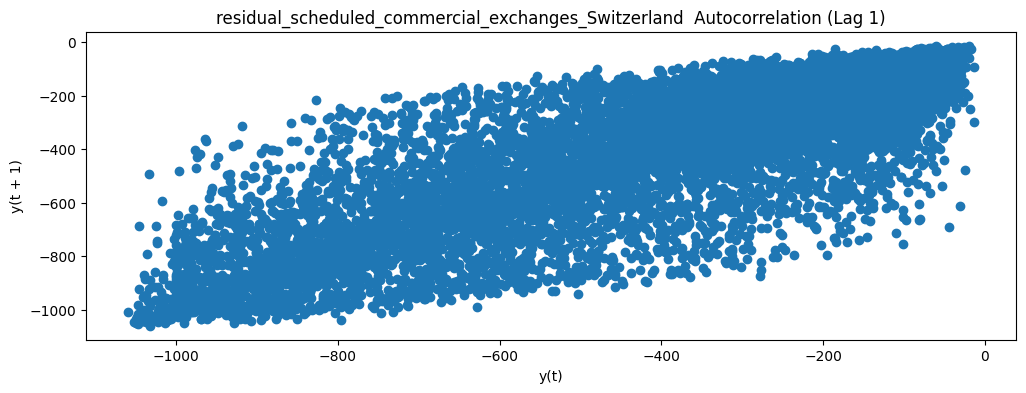

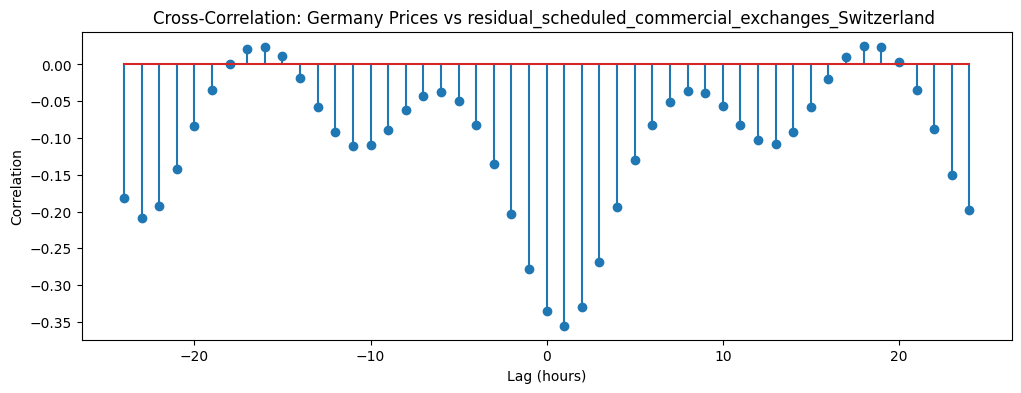

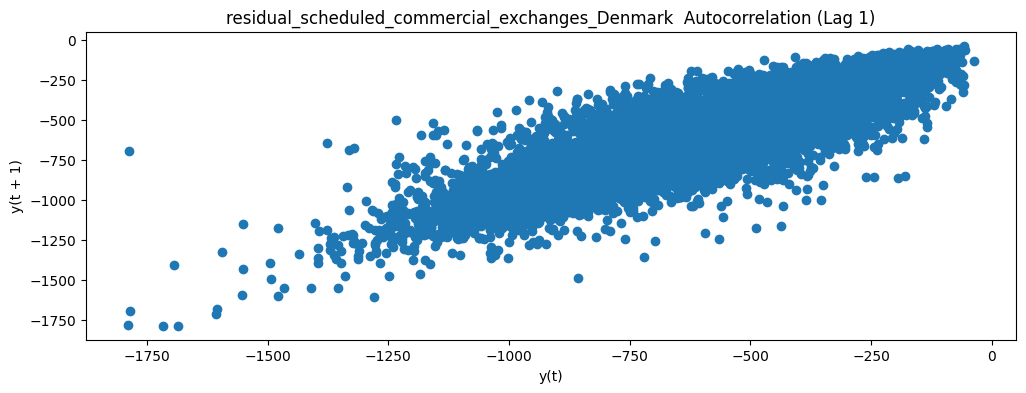

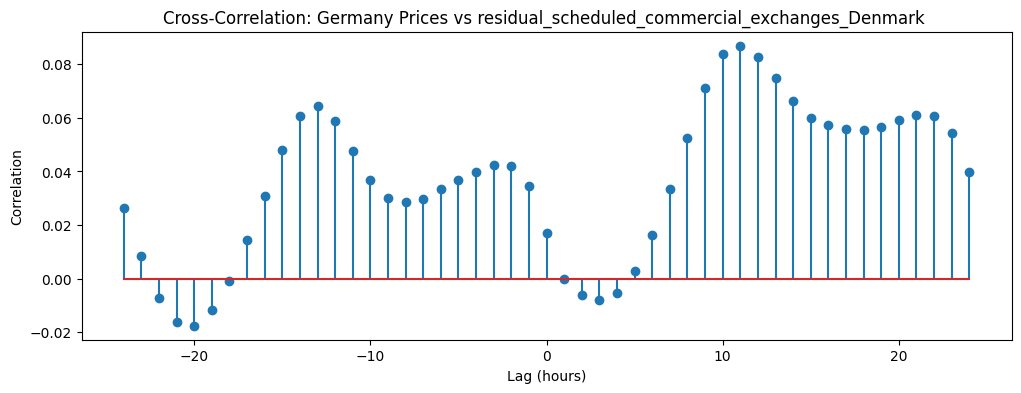

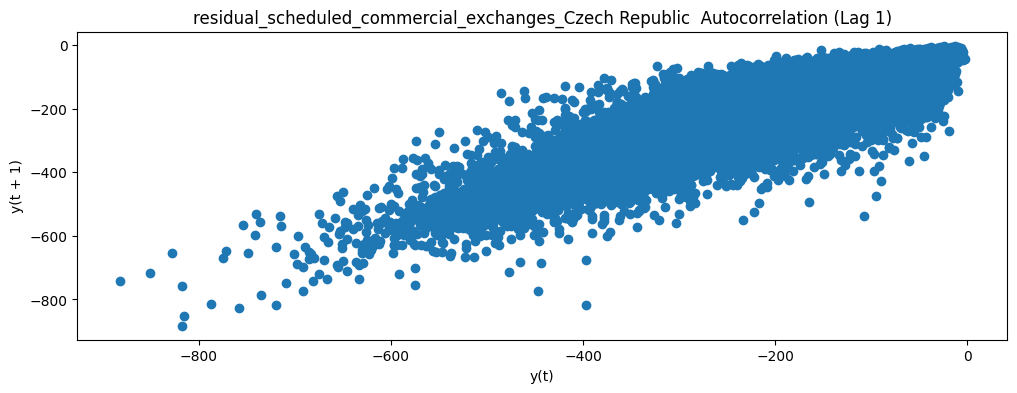

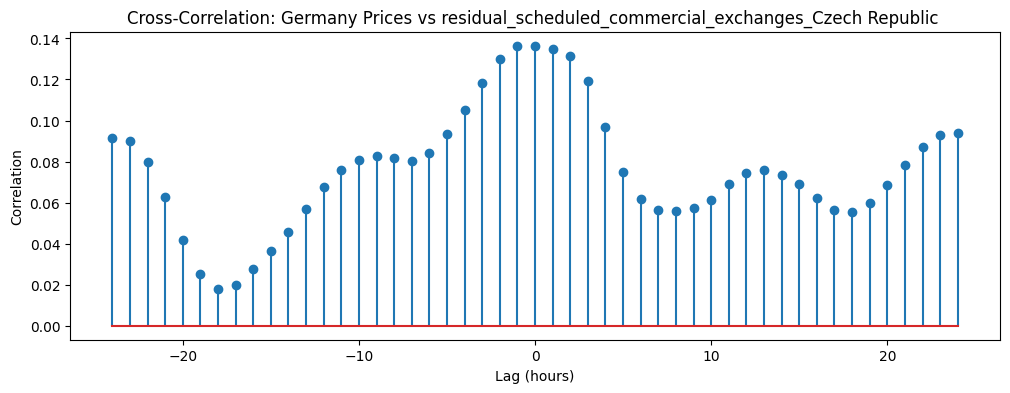

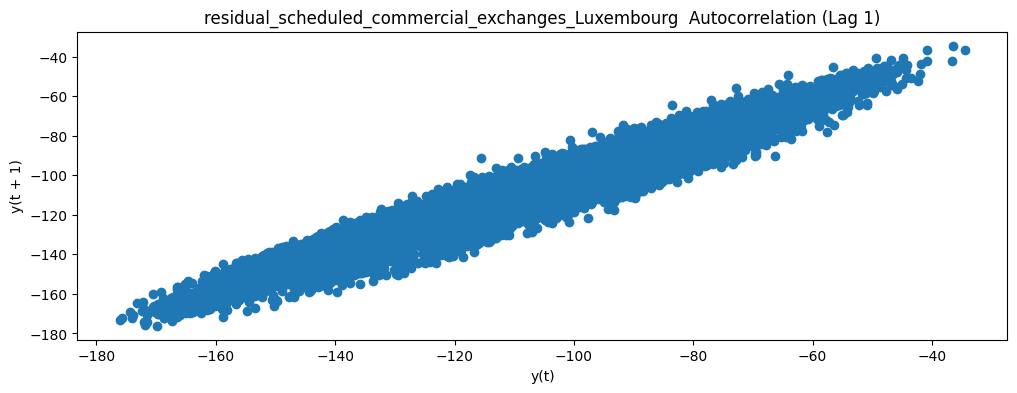

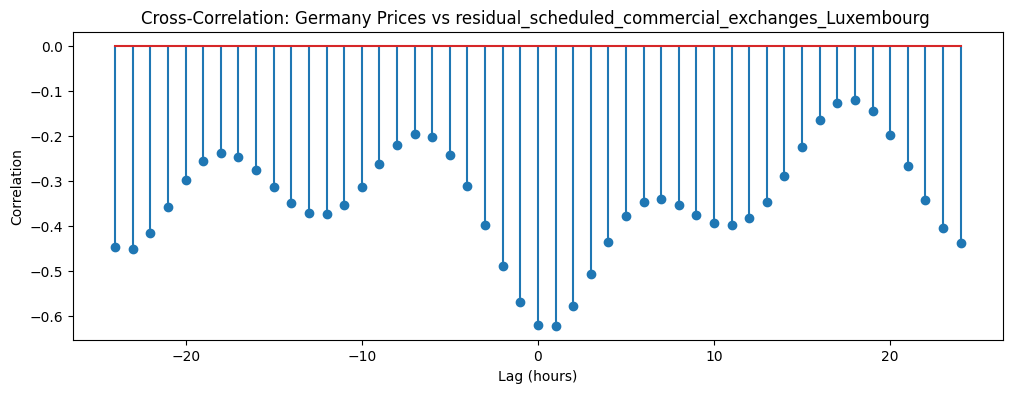

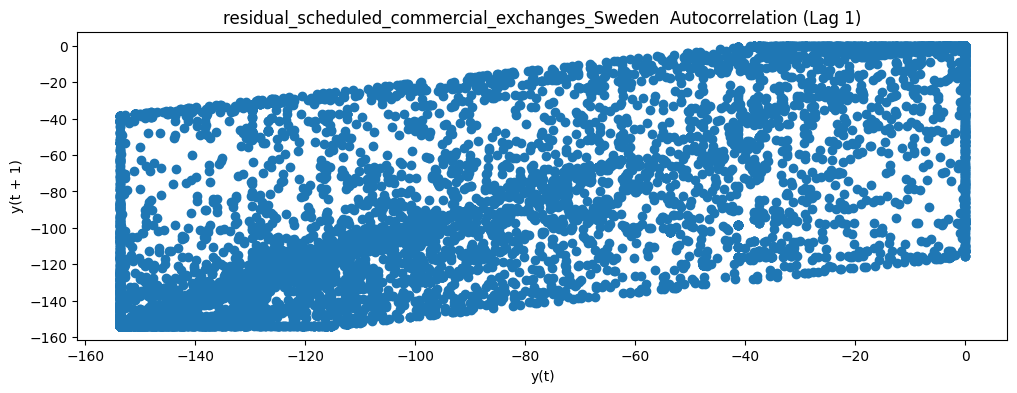

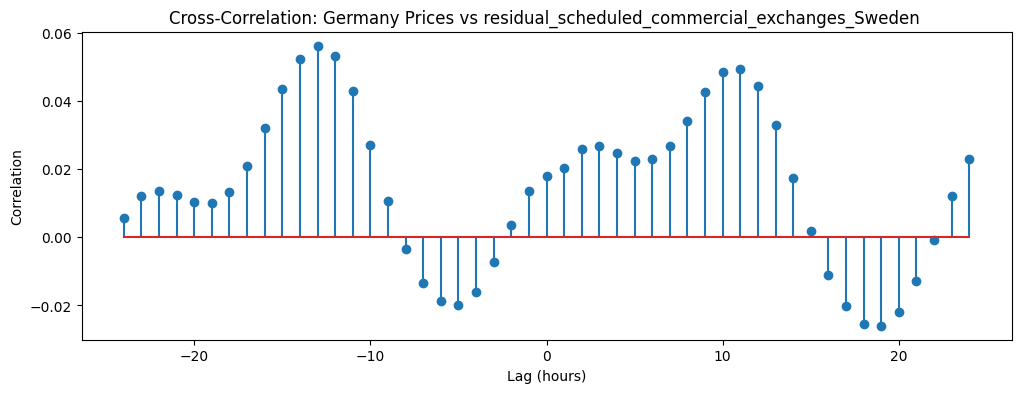

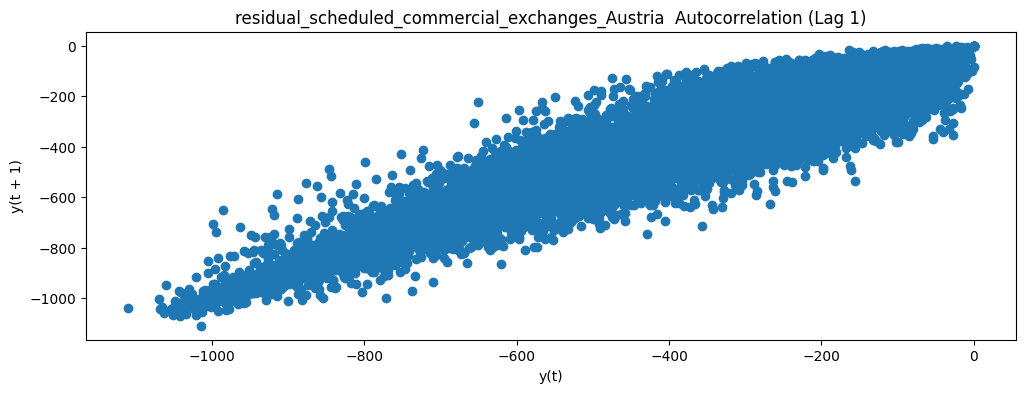

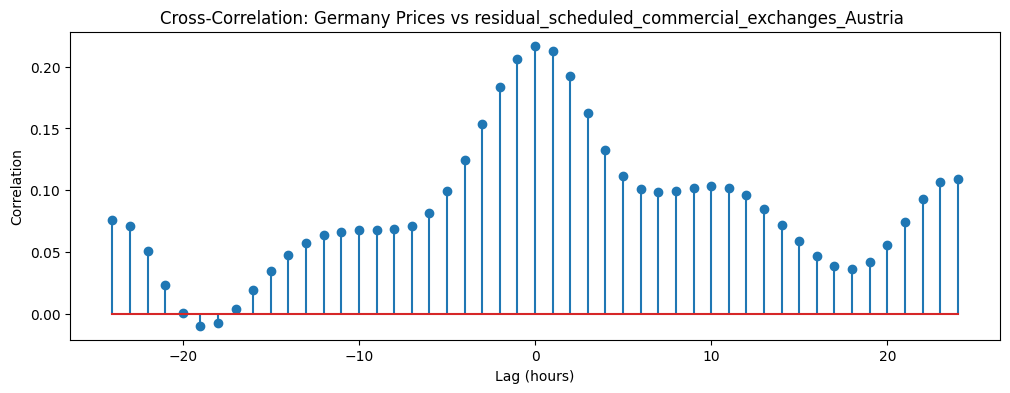

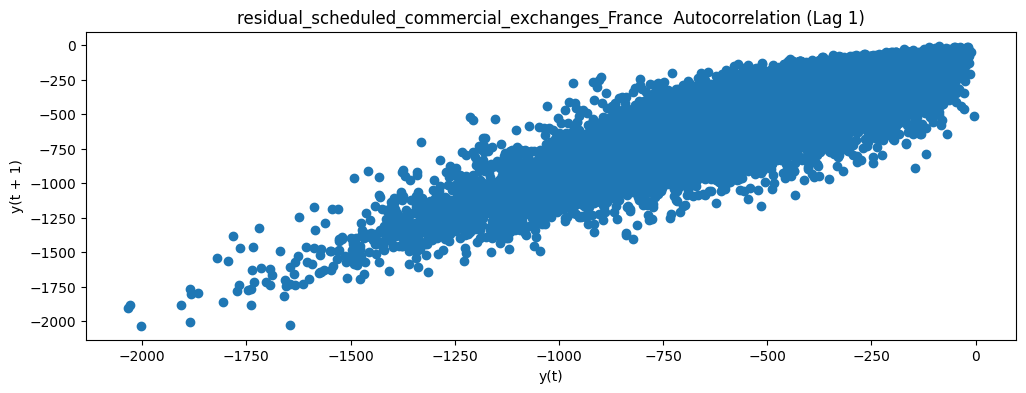

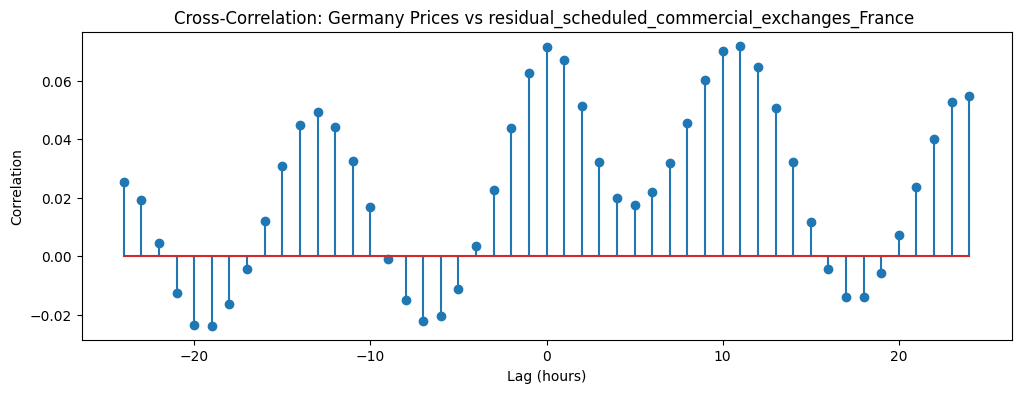

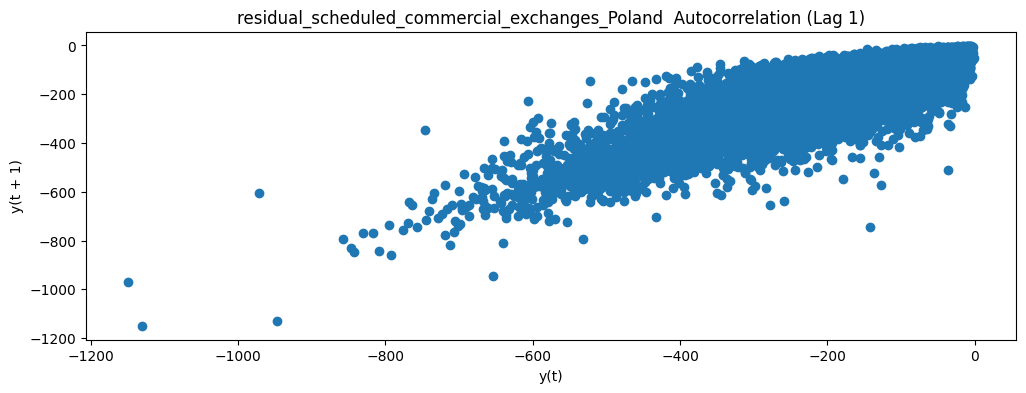

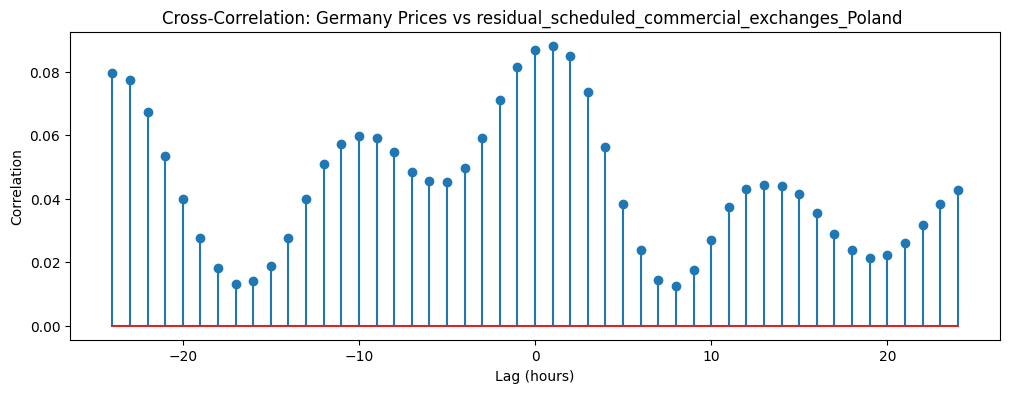

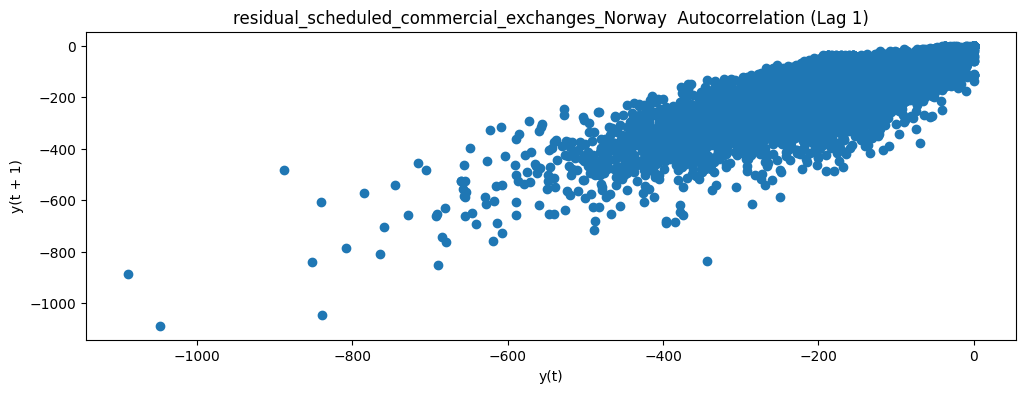

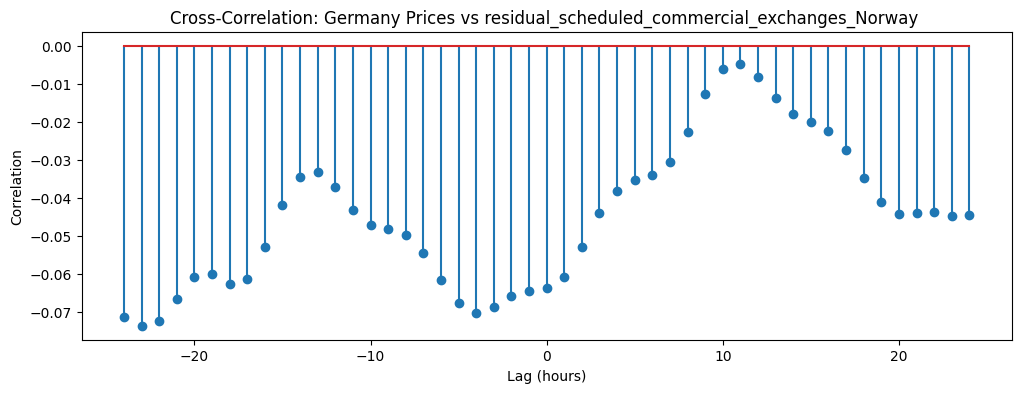

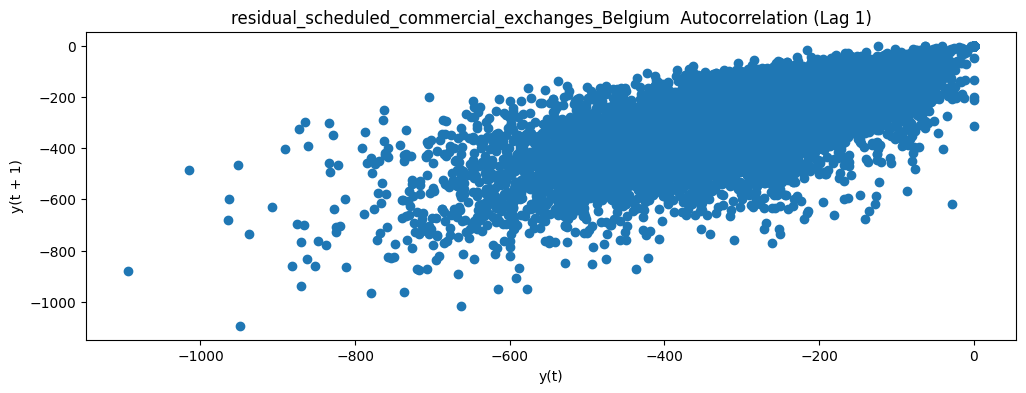

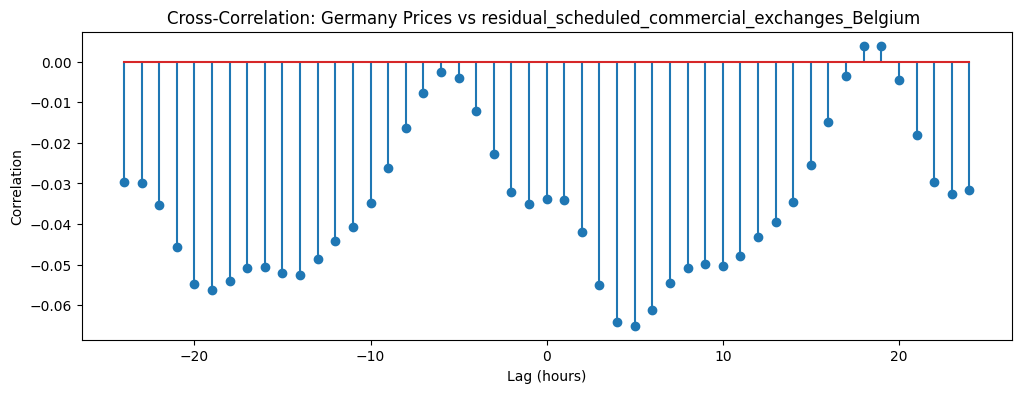

In [ ]:
max_lag = 24  # 24 hours for daily pattern analysis

for col in residual_scheduled:
    fig, ax = plt.subplots(figsize=(12,4))
    pd.plotting.lag_plot(resampled_df[col], lag=1, ax=ax)
    ax.set_title(f'{col}  Autocorrelation (Lag 1)')
    plt.show()

    # Cross-correlation with prices
    ccf_values = [resampled_df[f'Day-ahead_prices_Germany/Luxembourg [€/MWh]'].corr(
        resampled_df[col].shift(lag))
        for lag in range(-max_lag, max_lag+1)]

    plt.figure(figsize=(12,4))
    plt.stem(range(-max_lag, max_lag+1), ccf_values)
    plt.title(f'Cross-Correlation: Germany Prices vs {col} ')
    plt.xlabel('Lag (hours)')
    plt.ylabel('Correlation')
    plt.show()


### What is the impact of cross-border physical flows on electricity prices?


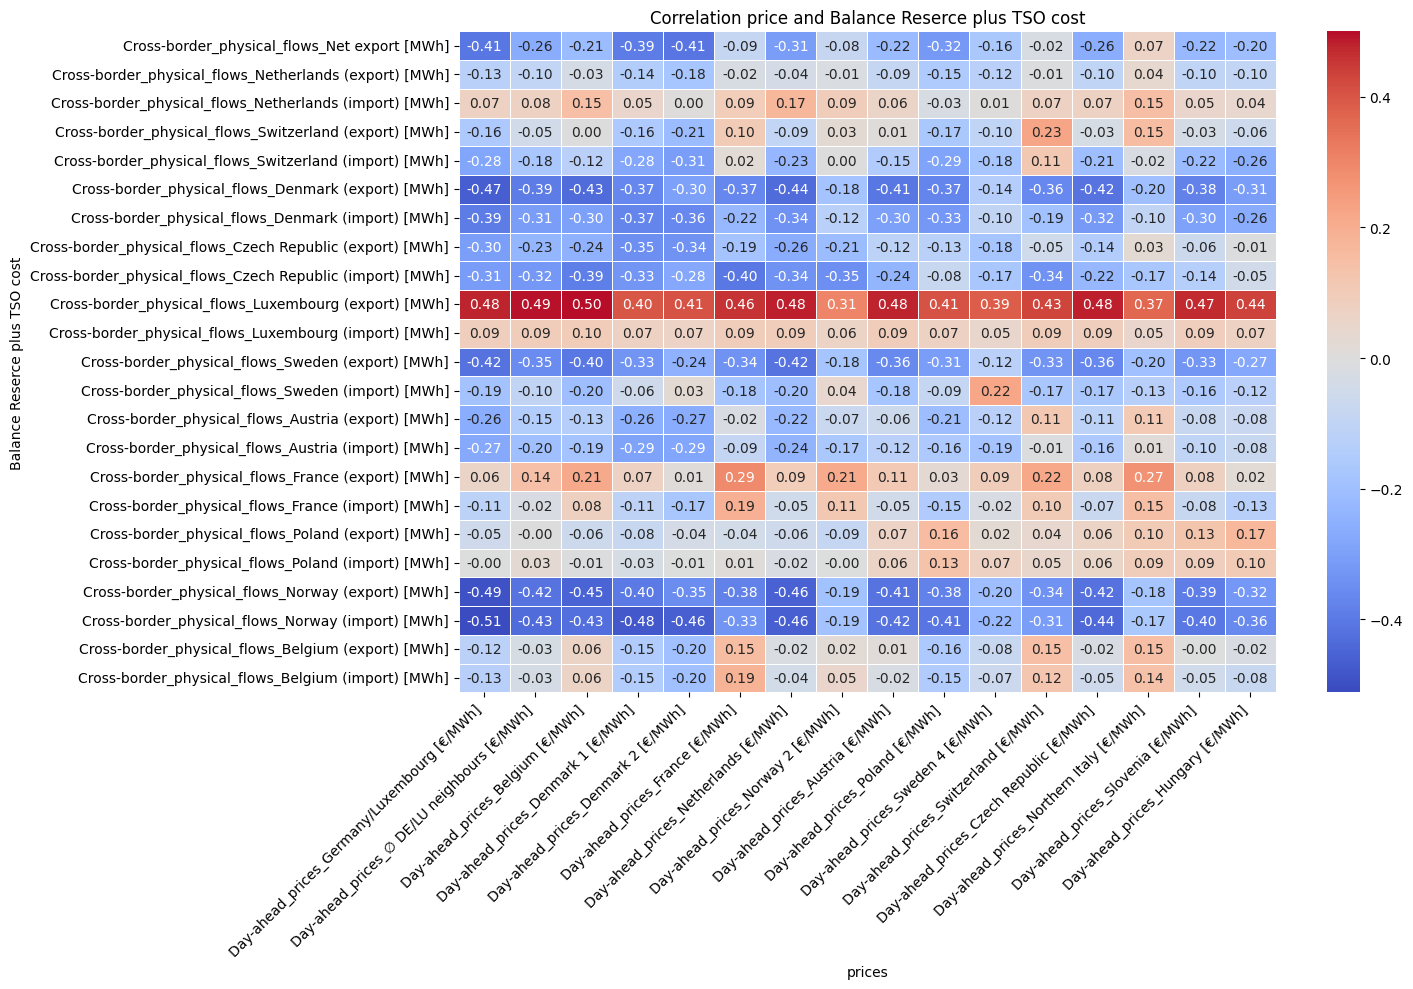

In [ ]:
corr_matrix = resampled_df[prices].apply(
    lambda col: resampled_df[cb].corrwith(col)
)
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation price and Balance Reserce plus TSO cost')
plt.xlabel('prices')
plt.ylabel('Balance Reserce plus TSO cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

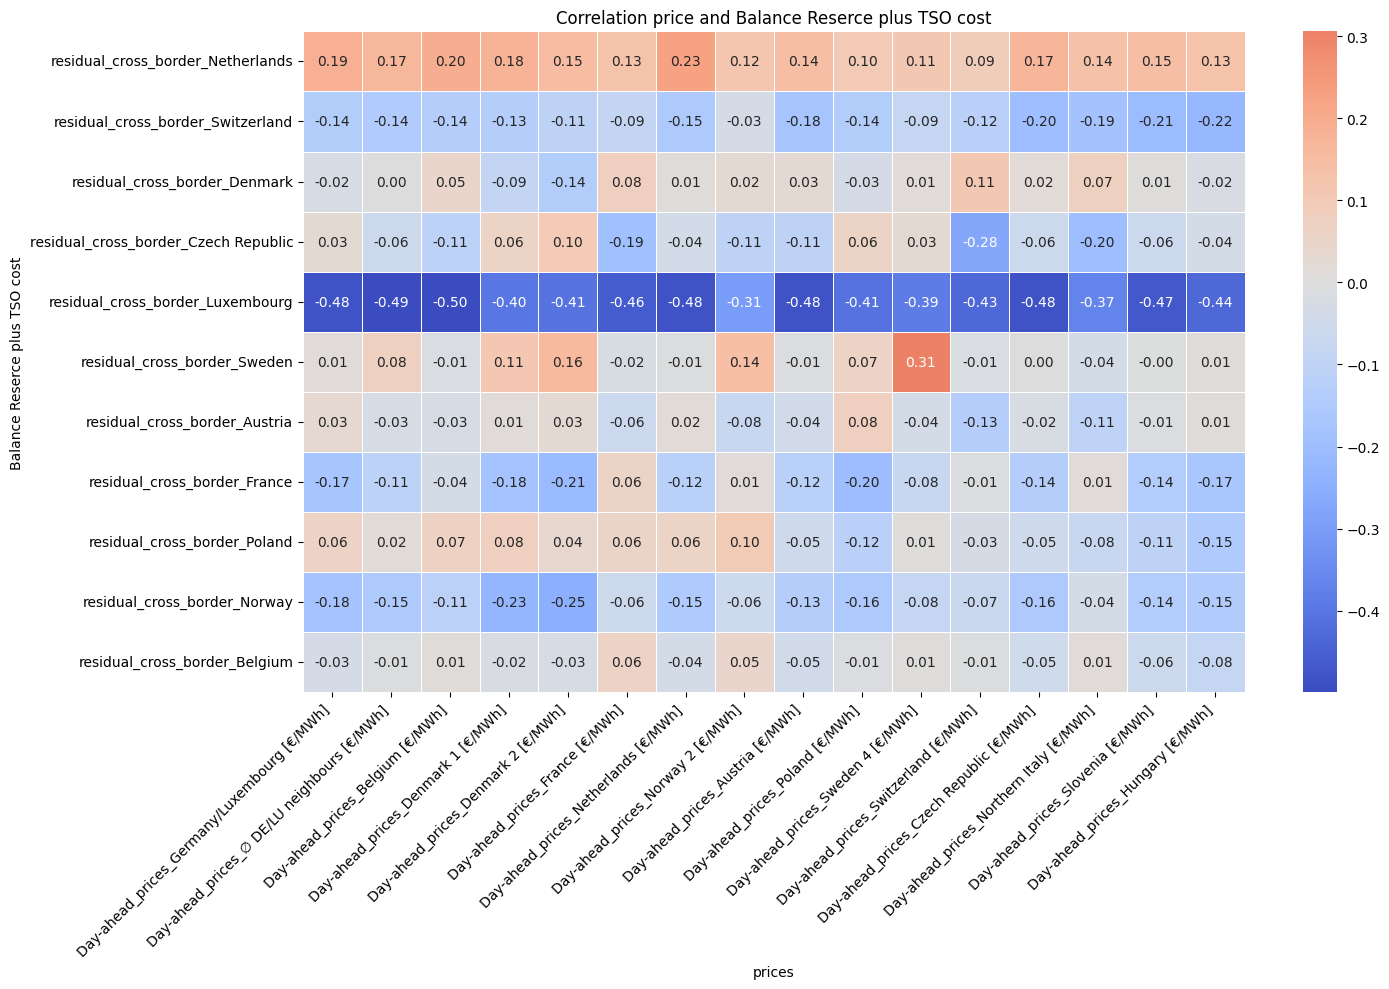

In [ ]:
corr_matrix = resampled_df[prices].apply(
    lambda col: resampled_df[residual_cb].corrwith(col)
)
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation price and Balance Reserce plus TSO cost')
plt.xlabel('prices')
plt.ylabel('Balance Reserce plus TSO cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

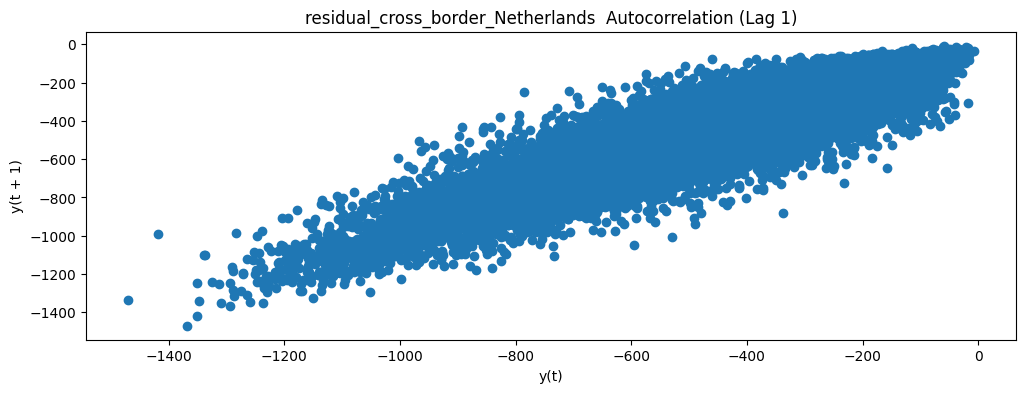

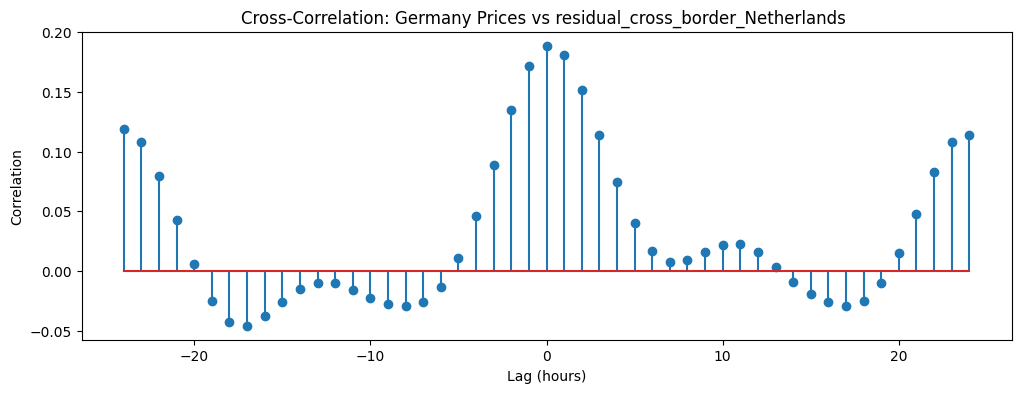

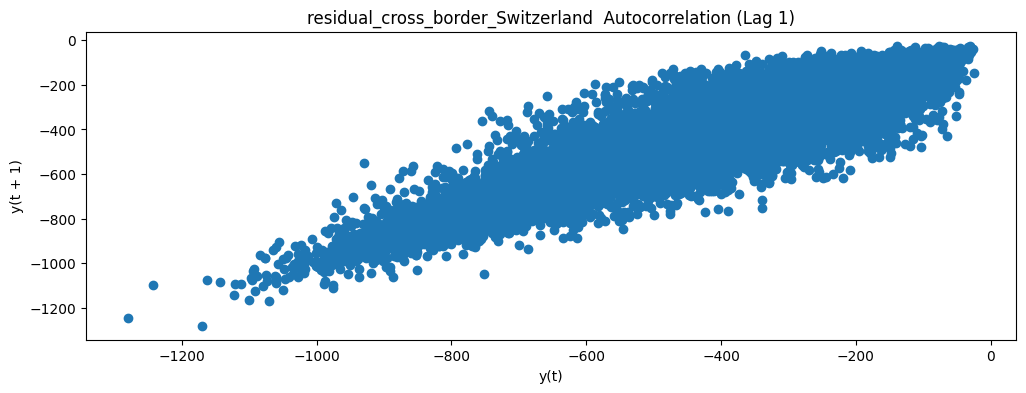

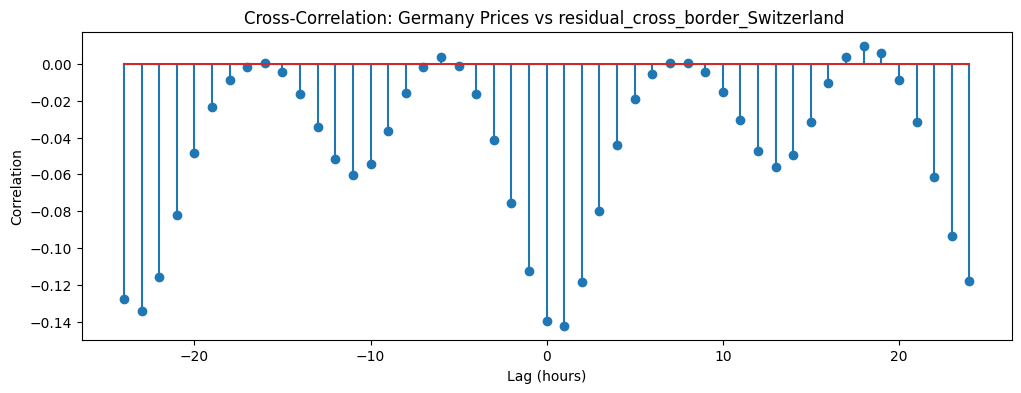

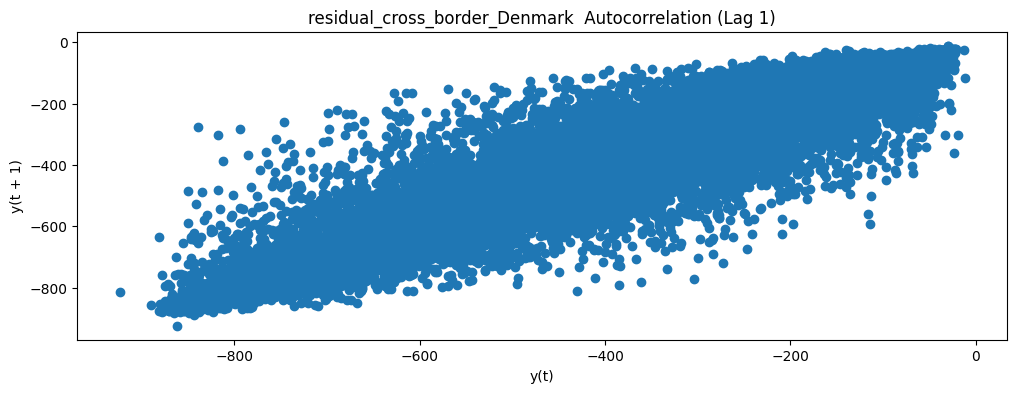

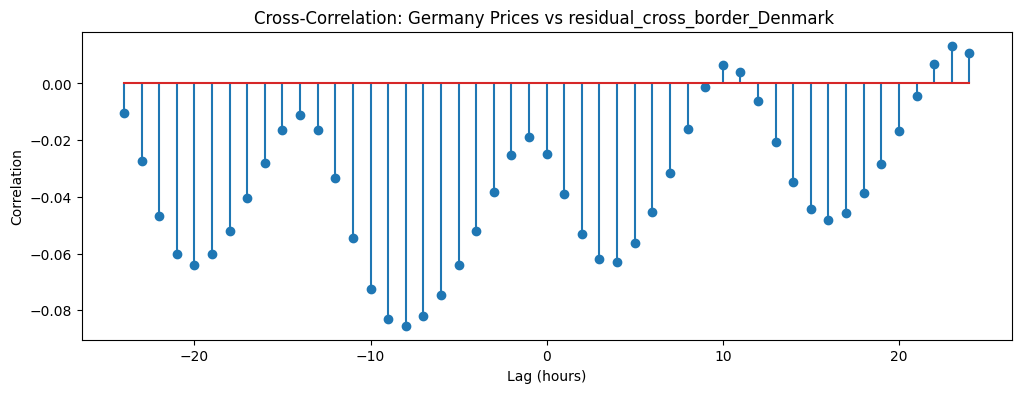

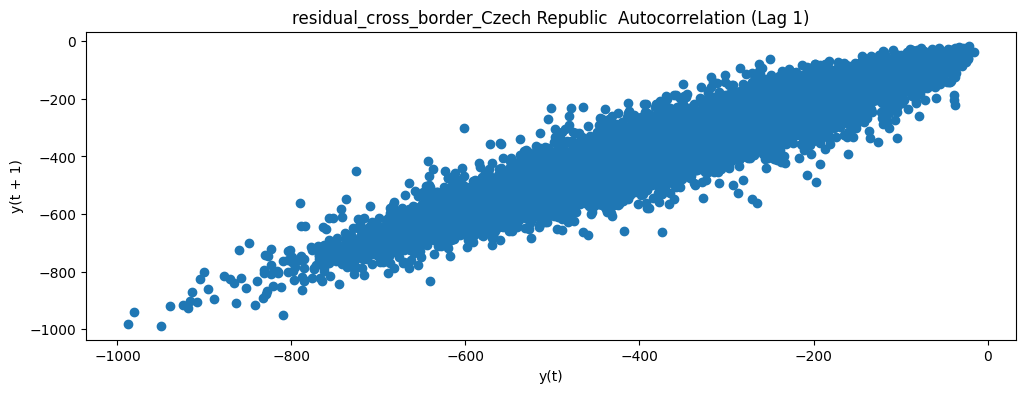

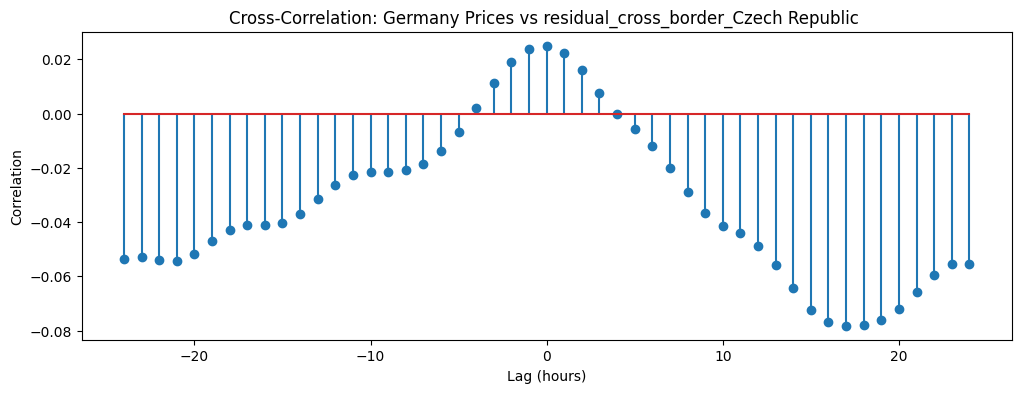

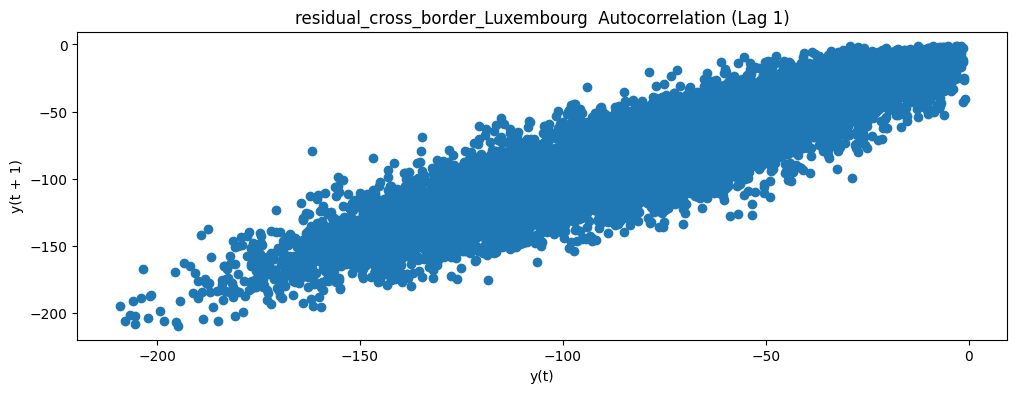

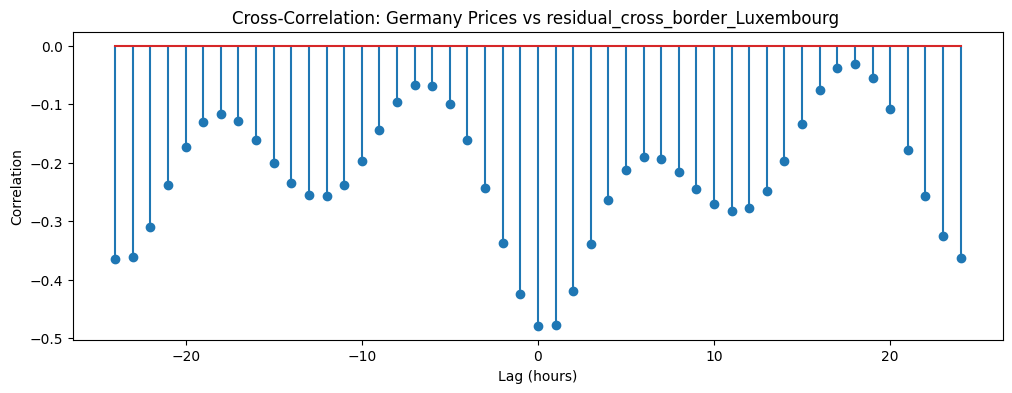

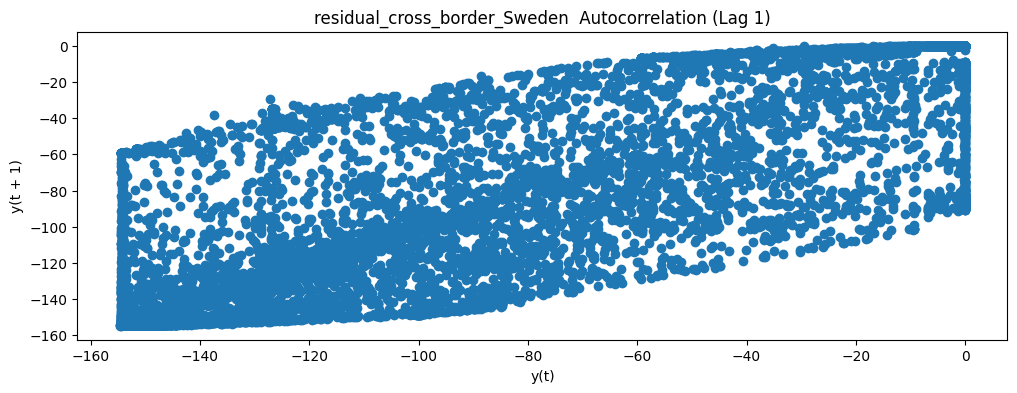

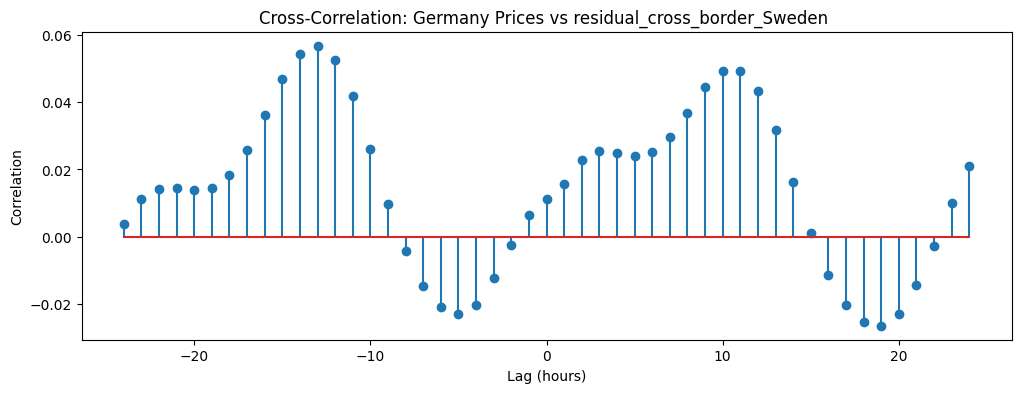

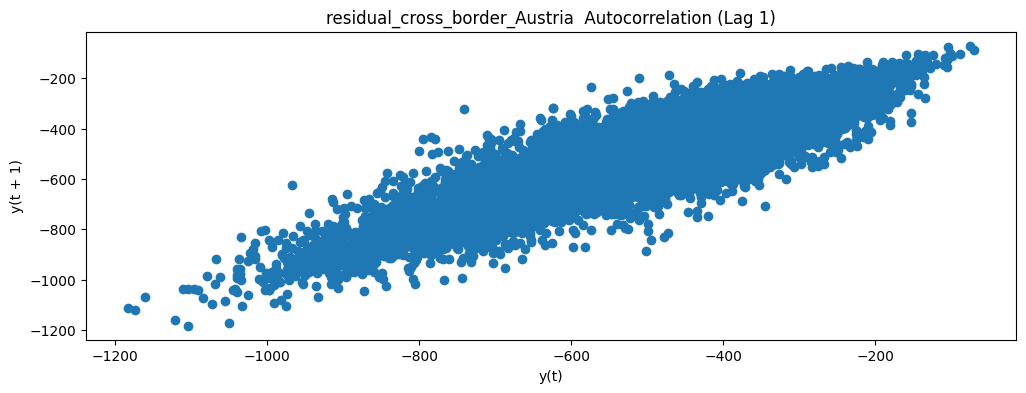

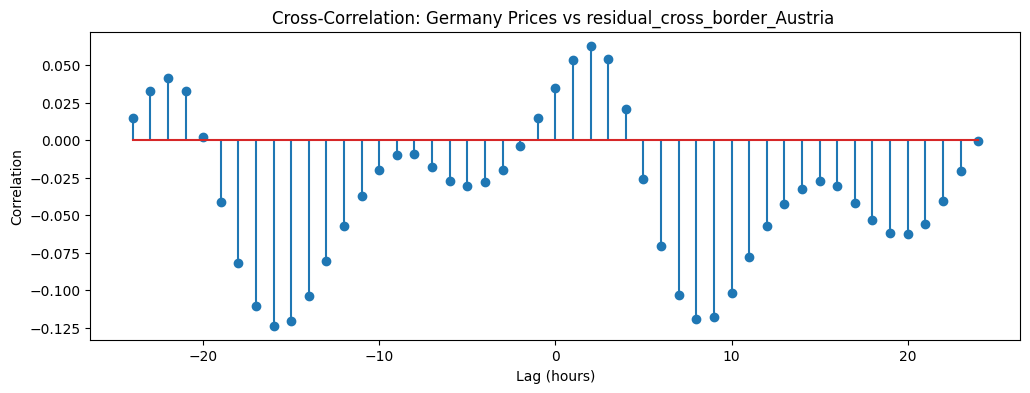

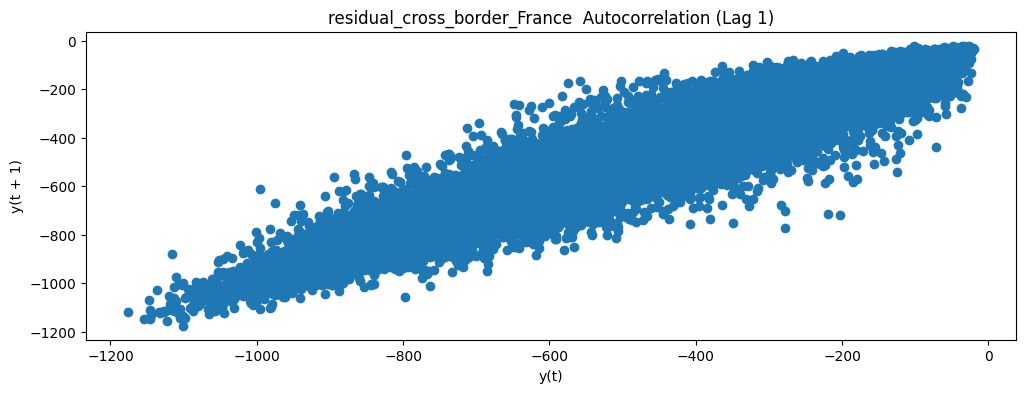

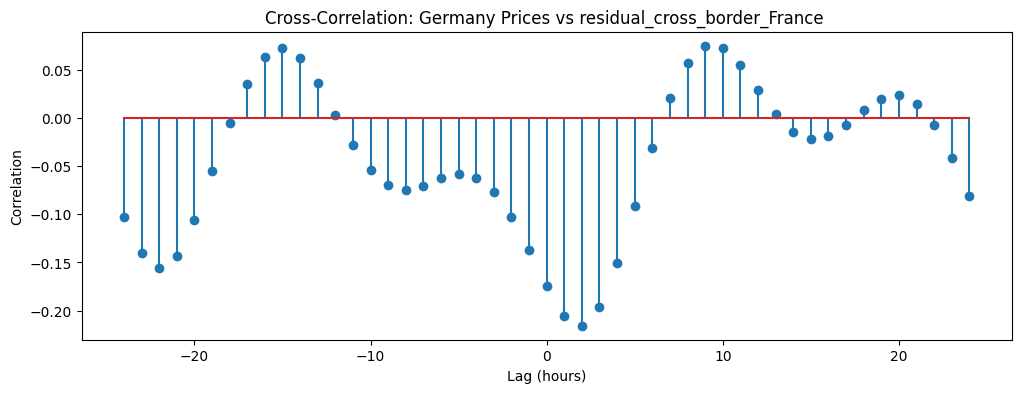

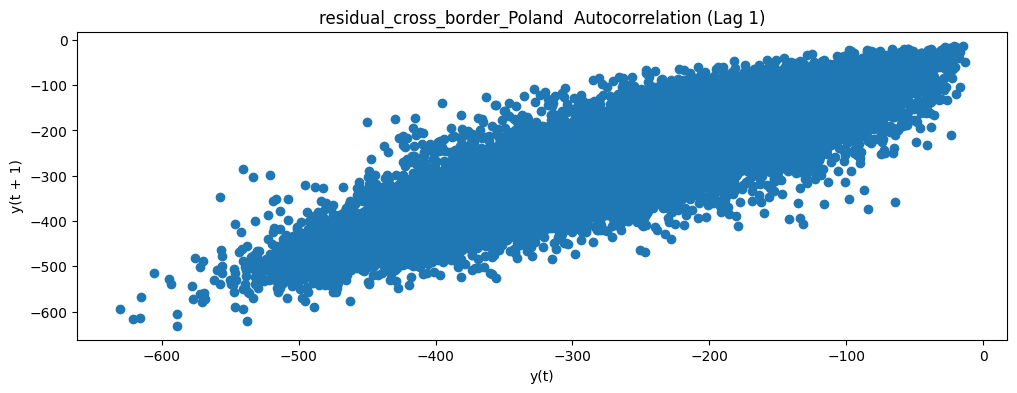

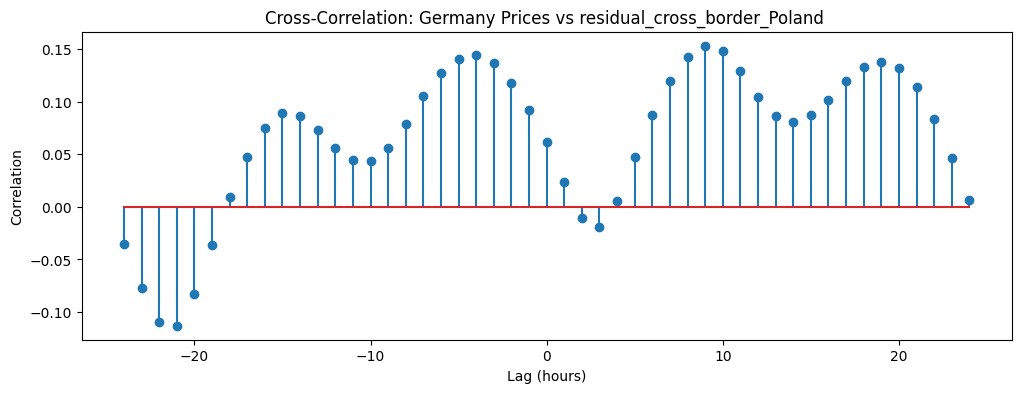

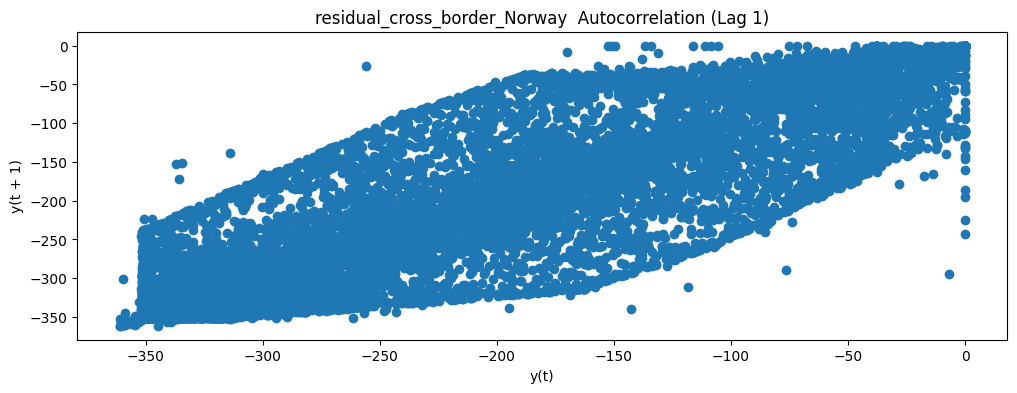

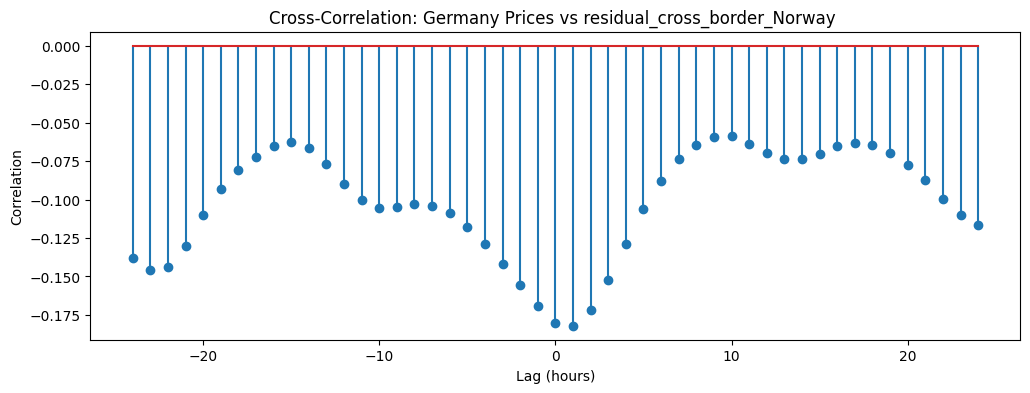

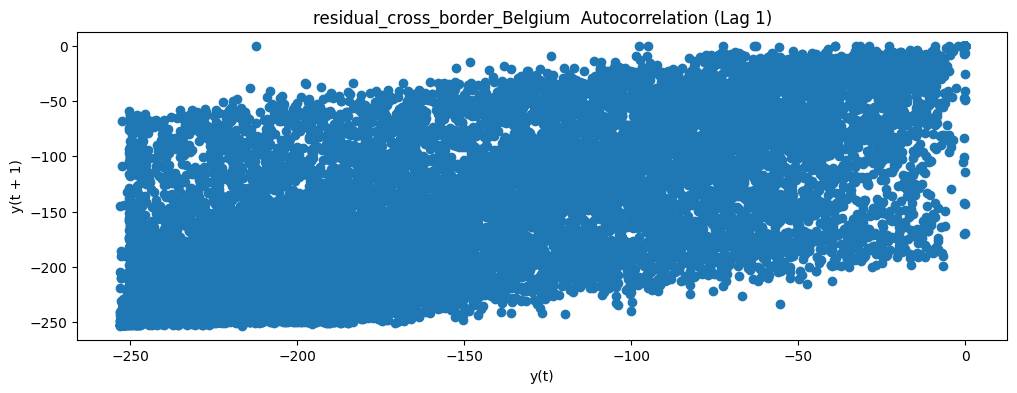

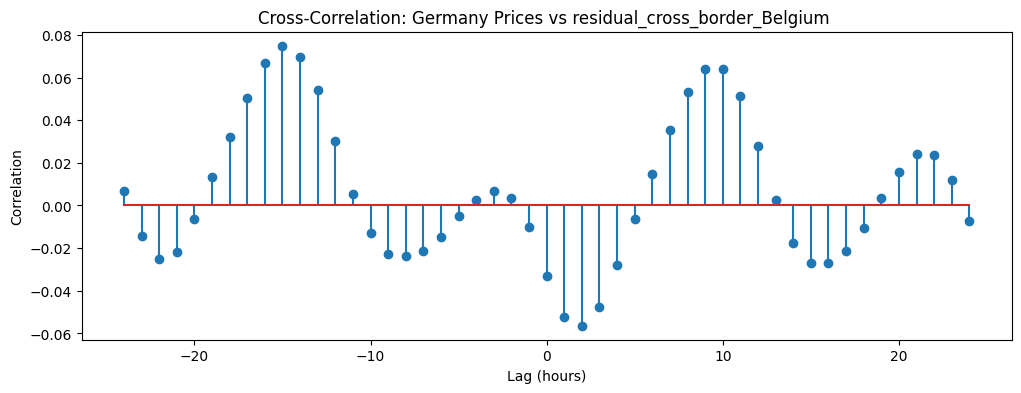

In [ ]:
max_lag = 24  # 24 hours for daily pattern analysis

for col in residual_cb:
    fig, ax = plt.subplots(figsize=(12,4))
    pd.plotting.lag_plot(resampled_df[col], lag=1, ax=ax)
    ax.set_title(f'{col}  Autocorrelation (Lag 1)')
    plt.show()

    # Cross-correlation with prices
    ccf_values = [resampled_df[f'Day-ahead_prices_Germany/Luxembourg [€/MWh]'].corr(
        resampled_df[col].shift(lag))
        for lag in range(-max_lag, max_lag+1)]

    plt.figure(figsize=(12,4))
    plt.stem(range(-max_lag, max_lag+1), ccf_values)
    plt.title(f'Cross-Correlation: Germany Prices vs {col} ')
    plt.xlabel('Lag (hours)')
    plt.ylabel('Correlation')
    plt.show()


In [29]:
1

1